<a href="https://colab.research.google.com/github/scarioscia/modeling_biological_populations/blob/main/Day_3_Wright_Fisher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

#**Live Coding**

# **Basic Exercise: The Wright-Fisher Model**

The Wright-Fisher model is a model commonly used to investigate the effect of **genetic drift**, or random fluctuation of alleles from generation to generation caused by a finite population size. In this model, we assume: 

* Finite population size that is constant in size across generations
* Discrete generations that do not overlap
* No selection
* No assortative mating
* No mutation

We can think of Wright-Fisher as modeling an allele that is *evolutionarily neutral*. 

Since random effects are the only thing changing the frequency of an allele from generation to generation, we can simulate the change frequency from generation by sampling from the binomial distribution. The Binomial states taht the probability of observing j alleles in the next generation is: 

\begin{align}
&\binom{2N}{j}\;p^j_i\;(1-p_i)^{2N-j} \\[1em]
&\binom{n}{k} = \frac{n!}{ k!( n-k)!}
\end{align}

with $N$ as the population size and $i$ as the current allele frequency. Note that the quantity we care about here is $2N$ - the number of chromosomes! 

The easiest way to draw from the Binomial distribution is to use the function `np.random.binomial(n, p)`, where `n` is the number of trials and `p` is the probability of success. 

##**Exercise 1: The Wright-Fisher Model**

In the space below, create a function that implements the Wright-Fisher model. Your function should accept two arguments: 

* a starting allele frequency 
* the population size

Your function should run until one of the two alleles reaches **fixation**, i.e. your allele frequency hits 0 or 1. 

Your function should `return` a list containing the allele frequencies at every generation, including the first and last generations. 

In the space below, run your function with any starting allele frequency and a population of at least 100. Print out the time to fixation (i.e. the number of generations).

Using that same data, create a plot of allele frequency over time throughout your simulation.

# **Exercise 2: Multiple Iterations of the Model**

Most of the models we have studied in this class operate deterministically - that is, every time we run our code, we get the same result. This time, we are running a simulation with random behavior, so every time we run it, we will get a different result. Run your model repeatedly and create a plot of all your allele frequency trajectories on one plot. 

If you want all of your lines to be the same color, you can add the following to your `plot()` command: `plt.plot(<x values>, <y values>, <color>)`. Popular colors are: `'b'` - bluel; `'r'` - red; `'k'` - black.

In [ ]:
#@title <font color='green'>Run this cell for pseudcode</font>

print('Initialize a list to store WF results\nfor <some number of times>:\n  Run WF simulation and save output to your list\n\nCreate a figure\nfor each list in your list of lists:\n  Plot the allele frequency trajectory')

This is a neat figure, but it is hard to visualize more than a small number of allele frequency trajectories without things getting cluttered. Furthemore, it is not very easy to see the times to fixation. Both of these can be fixed using a histogram. First, run your WF model at least 1000 times, storing the **times to fixation** in a list.

Now, use matplotlib to create a histogram. The way to do this is: `ax.hist(<data to be visualized>, bins = <number of bins>)`. Here's an example: 

(array([ 3., 11.,  5., 14.,  9., 49., 28., 61., 39., 77., 76., 23., 51.,
        15., 24.,  6.,  5.,  1.,  2.,  1.]),
 array([46.  , 47.55, 49.1 , 50.65, 52.2 , 53.75, 55.3 , 56.85, 58.4 ,
        59.95, 61.5 , 63.05, 64.6 , 66.15, 67.7 , 69.25, 70.8 , 72.35,
        73.9 , 75.45, 77.  ]),
 <a list of 20 Patch objects>)

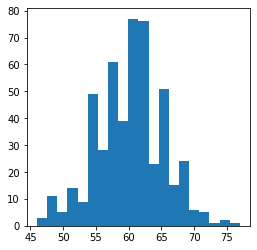

In [ ]:
hist_test = []
for i in range(500):
  hist_test.append(np.random.binomial(100, 0.6))

fig, ax = plt.subplots(figsize = (4,4))
ax.hist(hist_test, bins = 20)


Create your histogram below: 

#**Exercise 3: Effect of Pop Size and AF on fixation time**

We can use our model to investigate how changing the population size changes time to fixation. Pick at least five population sizes greater than or equal to 50. 

For each population size, run the model at least 50 times and find the **average** time to fixation. Keep your allele frequency constant for all runs. A hint about averages - if you have a list of numbers, you can find the average like this: `sum(my_list)/len(my_list)`.

Create a scatter or line plot of population size vs average time to fixation.

We can also do the same for allele frequencies. This time, pick a population size and vary the allele frequency. Run at least 10 trials for each allele frequency. I've included some code to create a list of evenly spaced allele frequencies below using the `np.arange()` function. This 

If your this takes a while to run, decrease your population size. For me, 1000 individuals and 10 trials per allele frequency ran fast enough.

In [ ]:
AFs = np.arange(0, 1, 0.01)


# **Advanced Exercise: Heatmaps**

in the basic exercises, you investigated the effects of changing starting allele frequency and of changing starting population size. We represented them individually as line plots. If we want to represent everything together in one figure, we can use a heatmap. 

A heatmap takes as input a 2D matrix, which for us will be a list of list, for example:

```
[[1, 2, 3],
[3, 1, 2],
[8, 2, 0]
```

In the cell block below, generate a list of pop_sizes from 1000 to 10000, with a step size of 1000. Also generate a list of AFs from 0 to 1 with a step size of 0.1. 

For each combination of pop size and times, run ten trials of your WF simulation. Save the average time to fixation. 

In [ ]:
#@title <font color='green'>Run this cell for pseudcode</font>

print('Initialize pop size list\nInitialize AF list\nInitialize a list to store heatmap input\n\nfor each population size:\n  Generate a list of times:\n  for each Allele Frequency:\n    Run ten trials of WF sim\n    Compute the average time to fixation\n    Save to your list of times\n  Add your list of times to your heatmap input')

To generate a heatmap, we can use the `seaborn` library. `Seaborn` is a package developed based on `matplotlib` that makes creating beautiful figures easy. The heatmap command is `sns.heatmap(<input data>)`. Create your heatmap below: